<a href="https://colab.research.google.com/github/MonirulIslamm08/Online-Job-Postings-Resume-Screening-with-NLP/blob/main/Online_Job_Postings_Resume_Screening_with_JobFitNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('/content/data job posts.csv')
df.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [2]:
 df.shape

(19001, 24)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

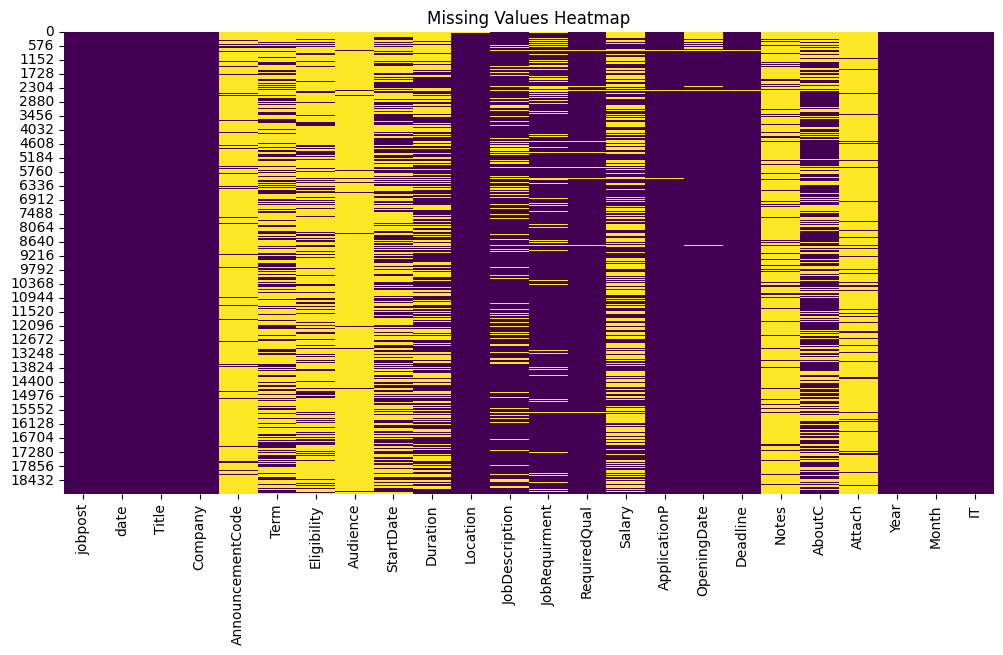

In [5]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [6]:
cols_to_drop = ['AnnouncementCode', 'Audience', 'Notes', 'Attach', 'Eligibility', 'Term']
df = df.drop(columns=cols_to_drop)

# Job Titles Distribution

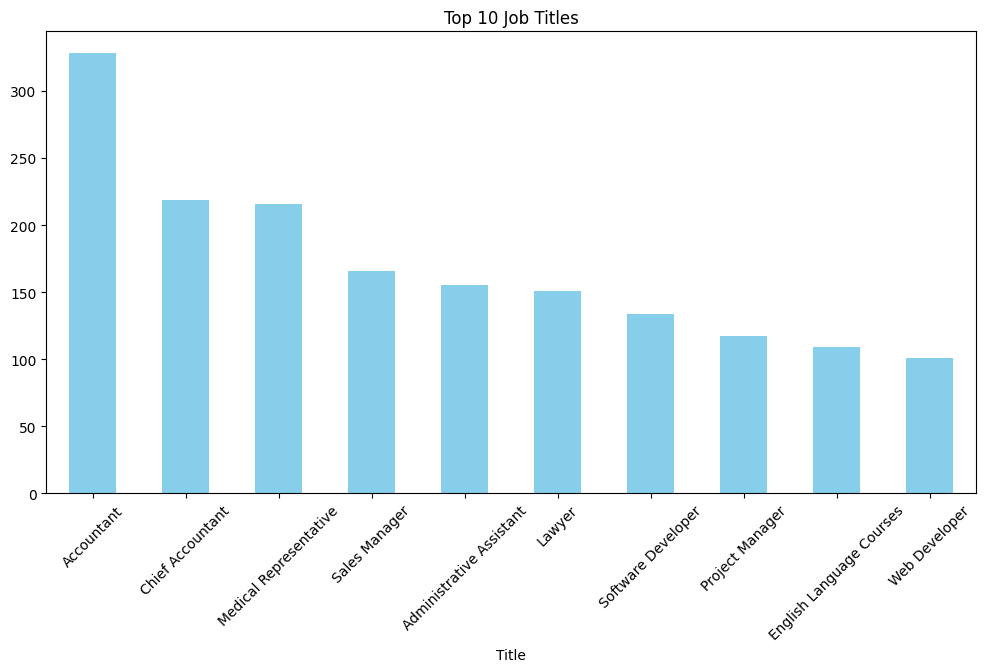

In [7]:
plt.figure(figsize=(12, 6))
df['Title'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Job Titles")
plt.xticks(rotation=45)
plt.show()

# Company Distribution

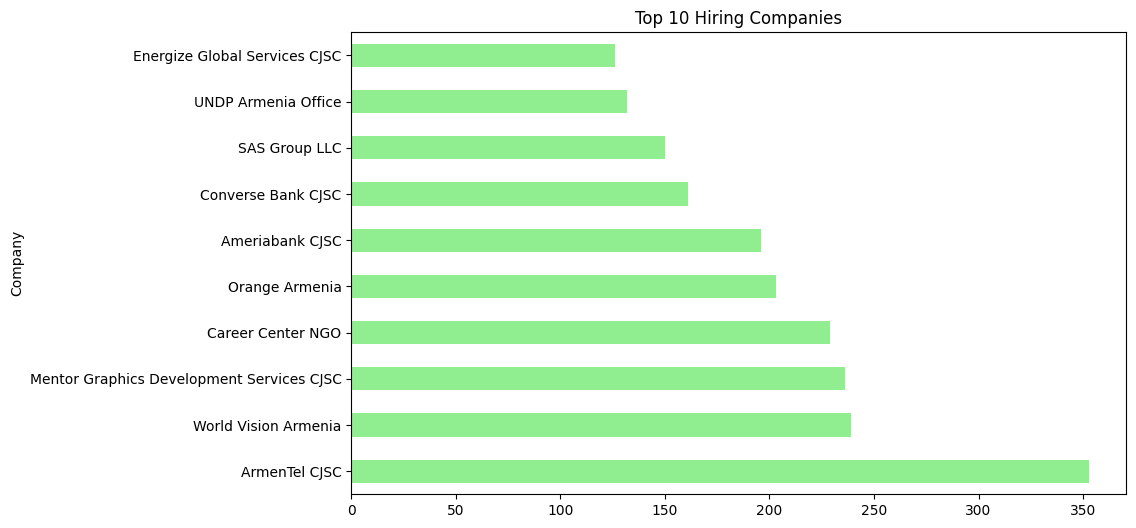

In [8]:
plt.figure(figsize=(10, 6))
df['Company'].value_counts().head(10).plot(kind='barh', color='lightgreen')
plt.title("Top 10 Hiring Companies")
plt.show()

# IT Jobs vs. Non-IT Jobs

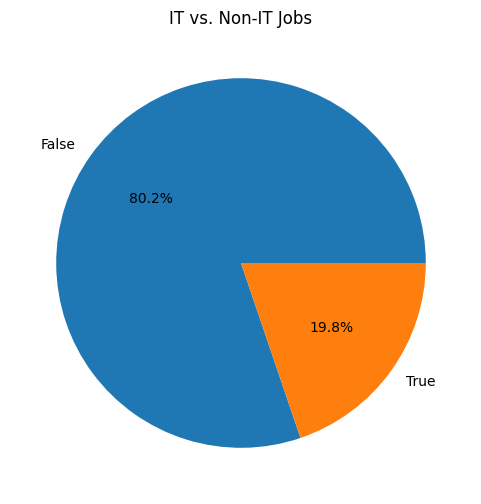

In [9]:
plt.figure(figsize=(6, 6))
df['IT'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("IT vs. Non-IT Jobs")
plt.ylabel("")
plt.show()

# Month-wise job posting distribution with IT & nonIT

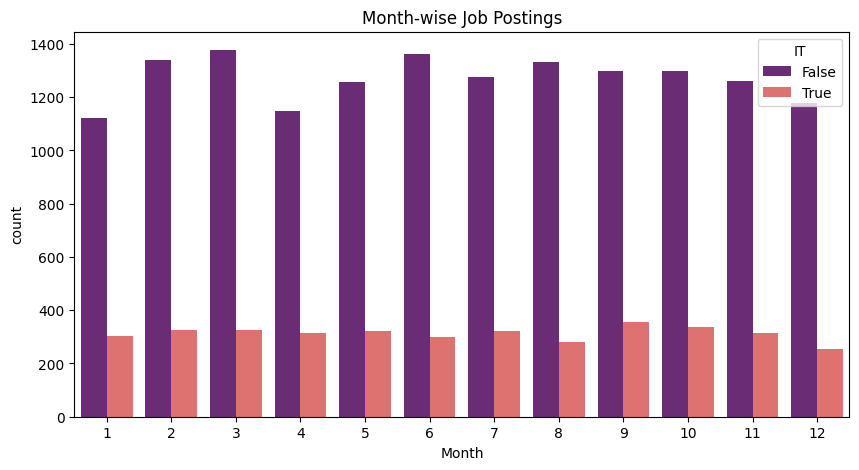

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Month'],hue = df['IT'], palette="magma")
plt.title("Month-wise Job Postings")
plt.show()

# Top 5 Location Analysis

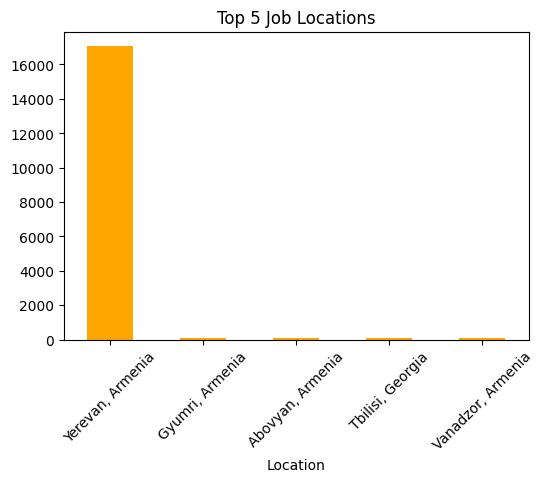

In [11]:
plt.figure(figsize=(6, 4))
df['Location'].value_counts().head(5).plot(kind='bar', color='orange')
plt.title("Top 5 Job Locations")
plt.xticks(rotation=45)
plt.show()

# Word Cloud for Job *Descriptions*

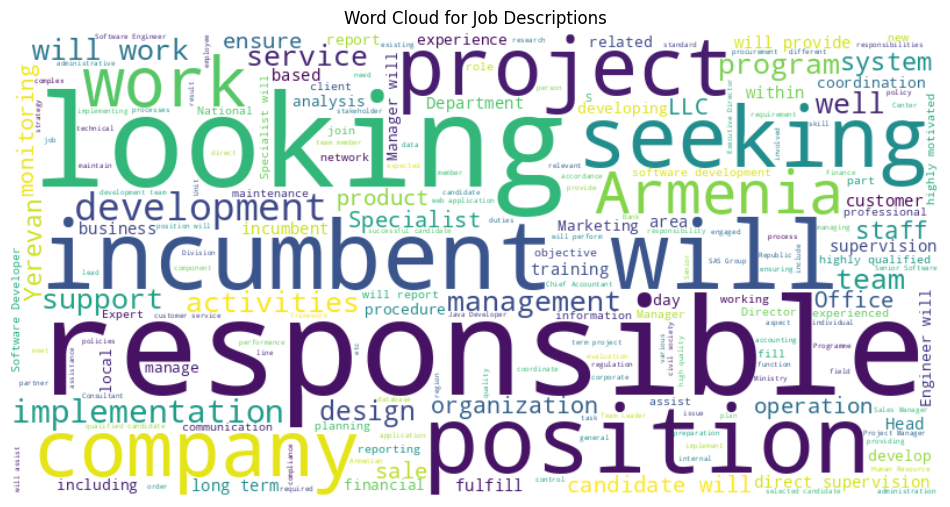

In [12]:
from wordcloud import wordcloud, WordCloud
text = " ".join(df['JobDescription'].dropna().astype(str))  # Handle NaN
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Job Descriptions")
plt.show()

# **key adjustments**

In [13]:
# Drop Irrelevant Columns
cols_to_drop = ['OpeningDate', 'Deadline','StartDate','Salary']
df = df.drop(columns=cols_to_drop)

In [14]:
# Fill missing text data
text_cols = ['JobDescription', 'JobRequirment', 'RequiredQual','AboutC','Duration']
df[text_cols] = df[text_cols].fillna('Not Specified')

In [15]:
df = df.dropna(subset=['Title'])


In [16]:
# Convert date columns to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract additional features
#df['Posting_Year'] = df['date'].dt.year
#df['Posting_Month'] = df['date'].dt.month
#df['Posting_Day'] = df['date'].dt.day


In [17]:
# Convert boolean to 0/1
df['IT'] = df['IT'].astype(int)

In [18]:
print(df['Location'].value_counts())

Location
Yerevan, Armenia                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

# **Text Preprocessing **

In [21]:
df['JobDescription'][0]

"AMERIA Investment Consulting Company is seeking a\r\nChief Financial Officer. This position manages the company's fiscal and\r\nadministrative functions, provides highly responsible and technically\r\ncomplex staff assistance to the Executive Director. The work performed\r\nrequires a high level of technical proficiency in financial management\r\nand investment management, as well as management, supervisory, and\r\nadministrative skills."

In [23]:
def chane_titles(x):
    x = x.strip()
    if x == 'Senior Java Developer':
        return 'Java Developer'
    elif x == 'Senior Software Engineer':
        return 'Software Engineer'
    elif x == 'Senior QA Engineer':
        return 'Software QA Engineer'
    elif x == 'Senior Software Developer':
        return 'Senior Web Developer'
    elif x =='Senior PHP Developer':
        return 'PHP Developer'
    elif x == 'Senior .NET Developer':
        return '.NET Developer'
    elif x == 'Senior Web Developer':
        return 'Web Developer'
    elif x == 'Database Administrator':
      return 'Database Admin/Dev'
    elif x == 'Database Developer':
        return 'Database Admin/Dev'

    else:
        return x


df['Title'] = df['Title'].apply(chane_titles)
df['Title'].value_counts()

,count
Title,
Accountant,328
Chief Accountant,219
Medical Representative,216
Sales Manager,166
Java Developer,157
...,...
Public Relations and Marketing Manager,1
"Software Developer (Ajax, ASP .Net)",1
"Software Developer (Ajax, PHP)",1


In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Title"] = le.fit_transform(df.Title)
df["Title"].value_counts()

,count
Title,
134,328
1179,219
4980,216
6688,166
4091,157
...,...
6151,1
7476,1
7477,1


In [25]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [26]:
def clean_text(text):
  text = re.sub(r'[^a-zA-Z\s]', '',str(text))
  text = text.lower()
  words = text.split()
  tokens = word_tokenize(text)
  tokens = [WordNetLemmatizer().lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
  return ' '.join(tokens)

In [30]:
# Combine text columns into a single feature
df['Full_Text'] = df['JobDescription'] + ' ' + df['JobRequirment'] + ' ' + df['RequiredQual']

In [32]:
df['Clean_Text'] = df['Full_Text'].apply(clean_text)

#  Train Word2Vec Embeddings

In [33]:
from gensim.models import Word2Vec

# Tokenize sentences into words
sentences = [text.split() for text in df['Clean_Text']]

# Train Word2Vec model
model_w2v = Word2Vec(
    sentences,
    vector_size=300,   # Embedding dimension
    window=5,          # Context window size
    min_count=2,       # Ignore rare words
    workers=4          # Parallel threads
)

# Save embeddings
model_w2v.save("word2vec.model")

# Convert Text to Embeddings

In [34]:
# Create document vectors by averaging word embeddings
def get_embedding(text):
    words = text.split()
    words = [word for word in words if word in model_w2v.wv]
    if len(words) == 0:
        return np.zeros(300)  # Handle empty text
    return np.mean(model_w2v.wv[words], axis=0)

df['Embedding'] = df['Clean_Text'].apply(get_embedding)

# Build and Train a Deep Learning Model

In [35]:
from sklearn.model_selection import train_test_split

X = np.array(df['Embedding'].tolist())
y = df['IT']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM ,Dropout

In [38]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(300,)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(tf.keras.layers.Reshape((1, 128))) # reshape
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model

In [42]:

history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=64,
    validation_split=0.1,
    class_weight={0: 1, 1: 2}  # Adjust if class imbalance exists
)

Epoch 1/15
214/214 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8734 - loss: 0.4673 - val_accuracy: 0.9084 - val_loss: 0.2182
Epoch 2/15
214/214 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9156 - loss: 0.2963 - val_accuracy: 0.8880 - val_loss: 0.2529
Epoch 3/15
214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9192 - loss: 0.2786 - val_accuracy: 0.9097 - val_loss: 0.1979
Epoch 4/15
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9166 - loss: 0.2687 - val_accuracy: 0.9183 - val_loss: 0.1973
Epoch 5/15
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9204 - loss: 0.2635 - val_accuracy: 0.9051 - val_loss: 0.2042
Epoch 6/15
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9253 - loss: 0.2622 - val_accuracy: 0.9130 - val_loss: 0.1959
Epoch 7/15
214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9201 - loss: 0.2493 - val_accuracy: 0.9177 - val_loss: 0.1786
Epoch 8/15
214/214 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9331 - loss: 0.2409 - val_accur

# Evaluate the Model

In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)
print(accuracy_score(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes))
print(confusion_matrix(y_test, y_pred_classes))

119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
0.9238471673254282
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      3017
           1       0.78      0.87      0.82       778

    accuracy                           0.92      3795
   macro avg       0.87      0.91      0.89      3795
weighted avg       0.93      0.92      0.93      3795

[[2826  191]
 [  98  680]]


# Predict for a Resume

In [45]:
def predict_resume(resume_text):
  cleaned_resume = clean_text(resume_text)
  embedding = get_embedding(cleaned_resume)
  embedding = np.expand_dims(embedding, axis=0)
  prediction = model.predict(embedding)[0][0]
  return 'IT Job' if prediction > 0.5 else 'Non-IT Job'

In [47]:
resume = """
Experienced software developer with 5+ years in Python and machine learning.
Proficient in TensorFlow and cloud platforms like AWS.
"""
print(predict_resume(resume))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
IT Job


# Deployment

In [48]:
model.save('resume_classifier.h5')